In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data processing/preprocessed.csv')
pd.set_option("display.max_columns", None)

In [3]:
X = df[['Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm','RainToday', 'Humidity3pm', 'Rainfall']]
y = df["RainTomorrow"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 0)

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

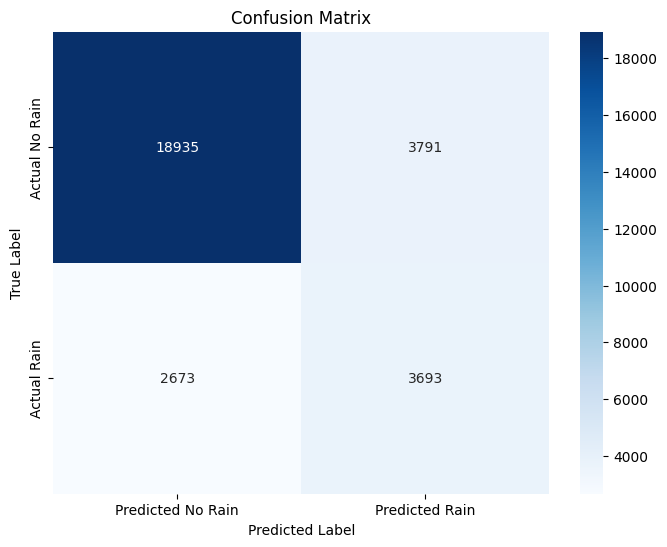

              precision    recall  f1-score   support

       False       0.88      0.83      0.85     22726
        True       0.49      0.58      0.53      6366

    accuracy                           0.78     29092
   macro avg       0.68      0.71      0.69     29092
weighted avg       0.79      0.78      0.78     29092



In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = gnb.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Rain', 'Predicted Rain'],
            yticklabels=['Actual No Rain', 'Actual Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(classification_report(y_test, y_pred))

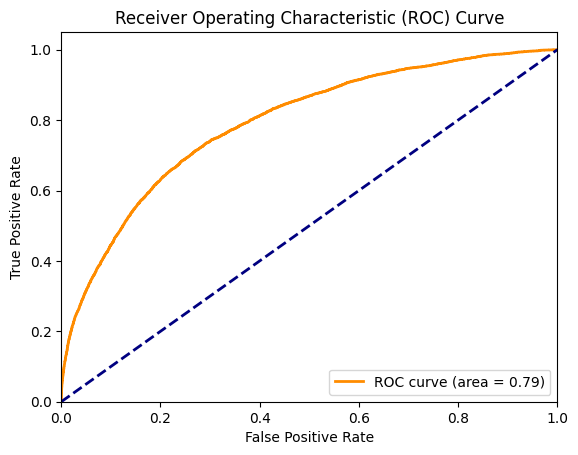

In [7]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = gnb.predict_proba(X_test)

positive_class_proba = y_pred_proba[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, positive_class_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()